# **Introduction**

This task is done using the CIFAR-10 dataset with which contains images grouped into 10 categories with 6000 images per class. There are 50000 training images and 10000 test images. Link: https://www.cs.toronto.edu/~kriz/cifar.html

The task I have decided to take on is classification. This is where I train the model to classify an image based on its features.

The code was created and run in Google collab using T4 GPUs due to its computational intensity needed to run it. In addition, I used pytorch's  torch vision library to perform the task.


The code contained in this notebook has a combination of both markdowns and code comments on what the cells do and the inteprated results and some bits of explanation.

In [1]:
# libraries needed
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch.nn as nn
import torch.nn.functional as F

from tqdm.notebook import tqdm #For creating progress bars

In [2]:
##Check processing device which is used
if torch.cuda.is_available():
    device = torch.device('cuda:0')
    print('Running on GPU')
    print(torch.cuda.get_device_name(0))
else:
    device = torch.device('cpu')
    print('Running on CPU')

Running on GPU
Tesla T4


From the result its visible that the model is running in a GPU specifically the Tesla T4 GPU

## Data processing

In [3]:
# downloading the CIFAR 10 training and testing data sets from torchvision.datasets

train_dataset = torchvision.datasets.CIFAR10(root='./cifar10', transform=torchvision.transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./cifar10', train=False, transform=torchvision.transforms.ToTensor(), download=True)

100%|██████████| 170498071/170498071 [00:13<00:00, 12912694.12it/s]


Extracting ./cifar10/cifar-10-python.tar.gz to ./cifar10
Files already downloaded and verified


In [4]:
#Creating Train and Test Loaders
train_loader = torch.utils.data.DataLoader(train_dataset, 128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, 128, shuffle=True )

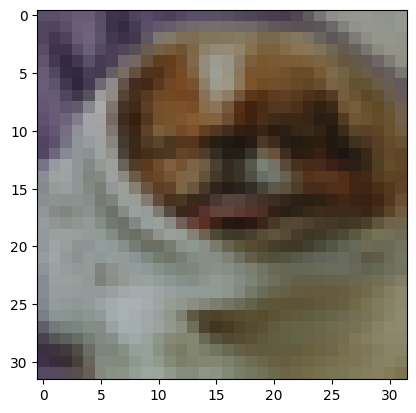

In [5]:
# visualizing a sample from train loader

train_iter = iter(train_loader)

batch_images, batch_labels = next(train_iter)
image, label = batch_images[10], batch_labels[0]
plt.imshow(image.permute(1,2,0)) #channel, height, width
plt.show()

from the above the image appears pixeleted/blurry because its real dimensions are 32 x 32 and displaying this is like really zooming in hence ith will appear pixeleted.

## Building the model

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.batchnorm2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.batchnorm3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.batchnorm4 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.batchnorm5 = nn.BatchNorm2d(128)
        self.conv6 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.batchnorm6 = nn.BatchNorm2d(256)
        self.conv7 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.batchnorm7 = nn.BatchNorm2d(256)
        self.pool = nn.MaxPool2d(2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256*4*4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)

    def forward(self, s):
        s = F.relu(self.conv1(s))
        s = self.batchnorm1(s)
        s = F.relu(self.conv2(s))
        s = self.batchnorm2(s)
        s = F.relu(self.conv3(s))
        s = self.batchnorm3(s)
        s = F.relu(self.conv4(s))
        s = self.batchnorm4(s)
        s = F.relu(self.conv5(s))
        s = self.batchnorm5(s)
        s = F.relu(self.conv6(s))
        s = self.batchnorm6(s)
        s = F.relu(self.conv7(s))
        s = self.batchnorm7(s)
        s = self.pool(s)
        s = self.flatten(s)
        s = F.relu(self.fc1(s))
        s = F.relu(self.fc2(s))
        s = F.relu(self.fc3(s))
        s = self.fc4(s)

        return s

The CNN I created has 15 layers in total. It includes seven convolutional layers  followed by batch normalization layers and a max-pooling layer . The network also features a flatten layer to prepare the data for fully connected layers. These layers are arranged in a sequential manner within the forward method, wherein input tensors undergo convolution, batch normalization, activation, and pooling operations, followed by flattening and fully connected layers

In [7]:
#Initialize model instance and specify where model will be stored(either GPU or CPU)

model = CNN()

model.to(device)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm6): BatchNorm2d(256, eps=1e-05, mom

From the above, there are parameters of the CNN which had been created before

In [8]:
# Choosing the Loss function to be used
criterion = torch.nn.CrossEntropyLoss()

In [9]:
#Choosing the optimizer and its hyperparameters
optimizer = torch.optim.Adam(model.parameters(), lr=0.003, weight_decay=1e-5) #Gradient descent optimizer

# **TRAINING AND TESTING**

This will be done through individual functions which will contain the train and test functions which will later be called on the train and test loop for each epoch

## Training

In [10]:
def train_one_epoch(model, train_loader, optimizer, criterion, device):
  model.train()
  for i, batch in tqdm(enumerate(train_loader)):
    inputs, labels = batch
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


  print('End of epoch loss:', round(loss.item(), 3))

  return round(loss.item(), 3) #return the loss for visualization purposes


## Testing

In [11]:
def test(model, test_loader, device):
    # Classes which are available in the dataset
    classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


    correct = 0

    for i, batch in tqdm(enumerate(test_loader)):
      inputs, labels = batch
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)
      prediction  = outputs.argmax(dim=1)

      correct += (prediction==labels).sum().item()



    accuracy = 100*correct/len(test_dataset)
    print('End of epoch accuracy:',accuracy, '%')


    # visualizing the current model's performance
    """Uncomment below to see sample visualizations, I commented due to it covering alot of space
    """
    # for i in range(1):
    #     print('Guess:', classes[prediction[i]], '| Label:', classes[batch_labels[i]])
    #     plt.imshow(inputs[i].cpu().permute(1,2,0))
    #     plt.show()

    return accuracy

# Running the train-test

Running of the train-test loop on each epoch where the results will be later graphed.

In [12]:
# run a loop which calls the training and testing functions created
NUM_EPOCHS = 10

#TO hold data which will later be used for visualizations
train_losses = {}
test_accuracies = {}

for epoch in range(NUM_EPOCHS):
    print("Epoch: ", epoch + 1)
    train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
    test_accuracy = test(model, test_loader, device)

    train_losses[epoch + 1] = train_loss
    test_accuracies[epoch + 1] = test_accuracy

Epoch:  1


0it [00:00, ?it/s]

End of epoch loss: 1.448


0it [00:00, ?it/s]

End of epoch accuracy: 48.59 %
Epoch:  2


0it [00:00, ?it/s]

End of epoch loss: 1.188


0it [00:00, ?it/s]

End of epoch accuracy: 57.96 %
Epoch:  3


0it [00:00, ?it/s]

End of epoch loss: 1.157


0it [00:00, ?it/s]

End of epoch accuracy: 65.16 %
Epoch:  4


0it [00:00, ?it/s]

End of epoch loss: 0.905


0it [00:00, ?it/s]

End of epoch accuracy: 69.74 %
Epoch:  5


0it [00:00, ?it/s]

End of epoch loss: 0.748


0it [00:00, ?it/s]

End of epoch accuracy: 70.04 %
Epoch:  6


0it [00:00, ?it/s]

End of epoch loss: 0.648


0it [00:00, ?it/s]

End of epoch accuracy: 73.14 %
Epoch:  7


0it [00:00, ?it/s]

End of epoch loss: 0.533


0it [00:00, ?it/s]

End of epoch accuracy: 73.45 %
Epoch:  8


0it [00:00, ?it/s]

End of epoch loss: 0.437


0it [00:00, ?it/s]

End of epoch accuracy: 75.07 %
Epoch:  9


0it [00:00, ?it/s]

End of epoch loss: 0.18


0it [00:00, ?it/s]

End of epoch accuracy: 75.43 %
Epoch:  10


0it [00:00, ?it/s]

End of epoch loss: 0.558


0it [00:00, ?it/s]

End of epoch accuracy: 74.72 %


### **Train Test Result Visualization**

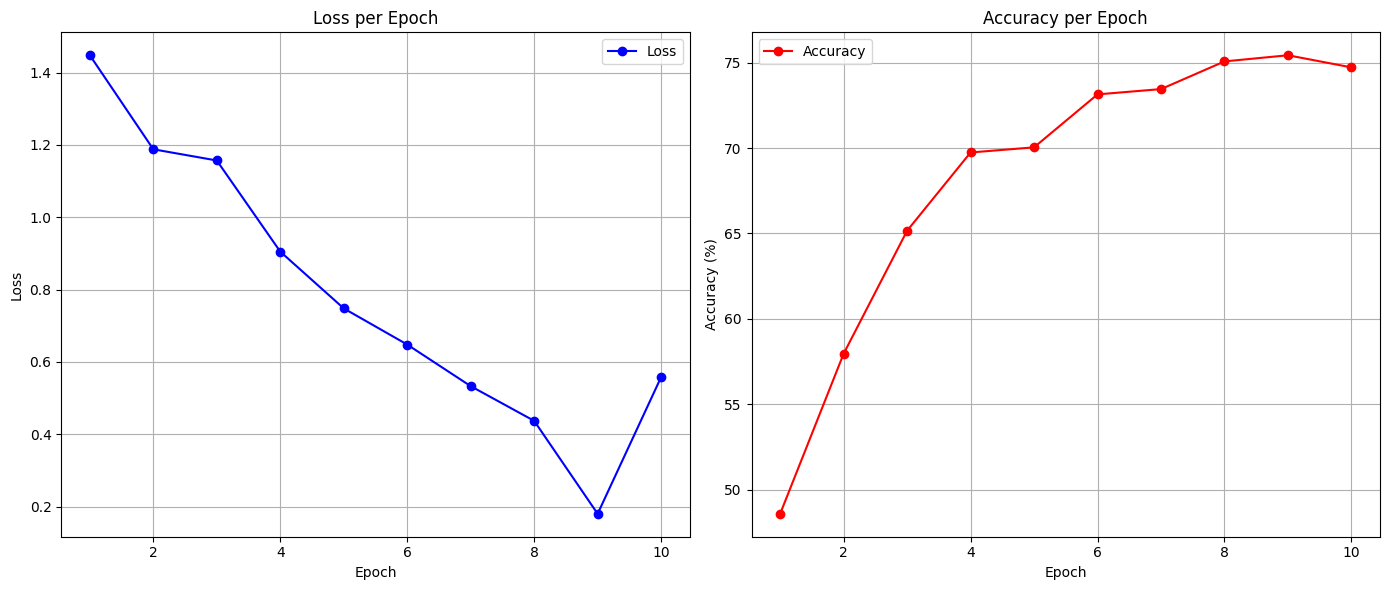

In [14]:
epochs = list(train_losses.keys())
losses = list(train_losses.values())
accuracies = list(test_accuracies.values())

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting for Loss
ax1.plot(epochs, losses, marker='o', linestyle='-', color='b', label='Loss')
ax1.set_title('Loss per Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

# Plotting for Accuracy
ax2.plot(epochs, accuracies, marker='o', linestyle='-', color='r', label='Accuracy')
ax2.set_title('Accuracy per Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

In [15]:
#Check parameters (trainable parameters)
param_size = 0
for param in model.parameters():
  param_size += np.prod(param.shape)

print(f"Number of parameters used in training: {param_size}")

Number of parameters used in training: 3428042


## **Interpretation of Results**

From the results, the convolutional neural network was trained in 10 epochs with a total of 3,428,042 parameters.

As shown in the graphs, throughout the training process, significant improvements were observed in both loss reduction and accuracy enhancement. Starting with an initial accuracy of 48.59% and a loss of 1.448 in the first epoch, the model steadily progressed, achieving its peak accuracy of 75.43% with a loss of 0.180 by the ninth epoch. This consistent improvement demonstrates the effectiveness of the training procedure, indicating the model's ability to learn and adapt to the dataset over time. However, a slight decrease in accuracy was noticed in the final epoch, suggesting potential fluctuations in performance that could be further investigated through validation procedures.

Overall, the CNN's performance showcases its capability to effectively learn features from the training dataset and generalize to unseen examples. The progression from an initial accuracy of under 50% to slightly over 75%  shows the model's ability in extracting meaningful patterns from the data. Further fine-tuning or exploration of model architecture and training parameters could potentially enhance performance and mitigate fluctuations observed in the final epochs.

# **Saving the model**

In [16]:

torch.save(model.state_dict(), "model.pth")


## Loading saved model

The model which was saved earlier can be loaded from the exact location which it was saved in file system.

In [17]:
new_model = CNN()
new_model.load_state_dict(torch.load("model.pth"))
new_model.to(device)
new_model.eval()


CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm6): BatchNorm2d(256, eps=1e-05, mom

In [18]:
#Testing the accuracy of the model which had been saved
accuracy = test(new_model, test_loader, device)
print(f"Accuracy: {accuracy}")

0it [00:00, ?it/s]

End of epoch accuracy: 74.88 %
Accuracy: 74.88
